# Create a H2H Corsi and TOI chart for any game or set of games

### Import

In [10]:
import PbPMethods2 as pm2
import ChartMethods
from pylab import *
%matplotlib inline
import GetPbP

### Set the season, game, etc
Format games like [30211, 30222, 30223] etc. This should work as long as the teams involved are the same. Also set a save_folder if you want to save to a particular folder.

In [11]:
save_folder = None
season = 2015
games = [30223]
strengths = ['5v5']

### Save/update the game logs (if necessary)
If you need to do this, comment out the '#'s.

In [12]:
#GetPbP.save(season, games, True)
for game in games:
    #GetPbP.parse_game(season, game, True)
    pass

### Get the data and do some housekeeping

In [13]:
(hname, rname), (horder, rorder), (hnumbers, rnumbers), (homecf, roadcf), (hcorsi, rcorsi), h2hcf, \
    (hwhcf_h, hwhcf_r), (htotalstoi, rtotalstoi), h2htoi, (hwhtoi_h, hwhtoi_r), \
    num_fs = pm2.h2h_chart_data(season, games, strengths)

brangey = [i - 0.5 for i in range(len(horder) + 1)]
brangex = [i - 0.5 for i in range(len(rorder) + 1)]

cdstr = homecf - roadcf
if cdstr > 0:
    cdstr = '+{0:d}'.format(cdstr)
elif cdstr == 0:
    cdstr = 'even'
cdstr = str(cdstr)
cdstr2 = roadcf - homecf
if cdstr2 > 0:
    cdstr2 = '+{0:d}'.format(cdstr2)
elif cdstr2 == 0:
    cdstr2 = 'even'
cdstr2 = str(cdstr2)
gamestr = ', '.join([str(x) for x in games])

In [14]:
if len(games) == 1:
    interteam_title = '{0:s} at {1:s} ({5:s}) H2H TOI and Corsi\n{2:d}-{3:s} Game {4:d}'.format(
        GetPbP.get_mascot_name(rname),
        GetPbP.get_mascot_name(hname),
        season, str(season + 1)[2:], games[0], cdstr)
    if save_folder is not None:
        interteam_file = '{0:s}{1:d}0{2:d} {3:s}@{4:s}.png'.format(save_folder, season, games[0],
                                                               GetPbP.get_mascot_name(rname),
                                                               GetPbP.get_mascot_name(hname))
    else:
        interteam_file = None
else:
    interteam_title = '{0:s} vs {1:s} ({5:s}) H2H TOI and Corsi\n{2:d}-{3:s} Games {4:s}'.format(
        GetPbP.get_mascot_name(rname),
        GetPbP.get_mascot_name(hname),
        season, str(season + 1)[2:], gamestr, cdstr)
    if save_folder is not None:
        interteam_file = '{0:s}{1:d}0{2:s} {3:s} vs {4:s}.png'.format(save_folder, season, '[Multi]',
                                                               GetPbP.get_mascot_name(rname),
                                                               GetPbP.get_mascot_name(hname))
    else:
        interteam_file = None

### Make the H2H chart

<p>In this example, the +1 in the top left cell means that with Crosby (row 1) and Ovechkin (column 1) both on the ice, the Penguins were +1 in shot attempt differential. More yellow in the box = more ice time (see color scale on right).</p>
<p>The "15.0, +2" at the end of the first row means the Penguins were +2 in Crosby's 15 5v5 minutes. The "15.1, +13" at the top of the first column means the Capitals were +13 in Ovechkin's 15.1 5v5 minutes.</p>
<p>The -33 in the title means the Penguins were -33 as a team in this game.</p>

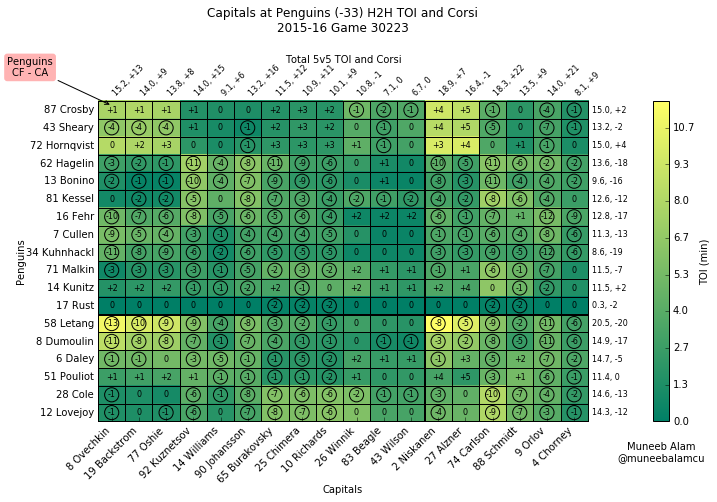

In [15]:
ChartMethods.general_h2h_chart(h2htoi, h2hcf, hcorsi, rcorsi, htotalstoi, rtotalstoi, brangex,
                      brangey, hname, horder, hnumbers, rname, rorder, rnumbers, num_fs, interteam_title,
                      interteam_file, True, True)

### More housekeeping

In [16]:
if len(games) == 1:
    hteam_title = '{0:s} ({4:s}) H2H TOI and Corsi\n{1:d}-{2:s} Game {3:d}'.format(GetPbP.get_mascot_name(hname),
                                                                                   season, str(season + 1)[2:],
                                                                                   games[0], cdstr)
    rteam_title = '{0:s} ({4:s}) H2H TOI and Corsi\n{1:d}-{2:s} Game {3:d}'.format(GetPbP.get_mascot_name(rname),
                                                                                   season, str(season + 1)[2:],
                                                                                   games[0], cdstr2)
    if save_folder is not None:
        hteam_file = '{0:s}{1:d}0{2:d} {3:s}.png'.format(save_folder, season, games[0], GetPbP.get_mascot_name(hname))
        rteam_file = '{0:s}{1:d}0{2:d} {3:s}.png'.format(save_folder, season, games[0], GetPbP.get_mascot_name(rname))
    else:
        hteam_file = None
        rteam_file = None
else:
    hteam_title = '{0:s} ({4:s}) H2H TOI and Corsi\n{1:d}-{2:s} Games {3:s}'.format(GetPbP.get_mascot_name(hname),
                                                                                   season, str(season + 1)[2:],
                                                                                   gamestr, cdstr)
    rteam_title = '{0:s} ({4:s}) H2H TOI and Corsi\n{1:d}-{2:s} Games {3:s}'.format(GetPbP.get_mascot_name(rname),
                                                                                   season, str(season + 1)[2:],
                                                                                   gamestr, cdstr2)
    if save_folder is not None:
        hteam_file = '{0:s}{1:d}0{2:s} {3:s}.png'.format(save_folder, season, '[Multi]', GetPbP.get_mascot_name(hname))
        rteam_file = '{0:s}{1:d}0{2:s} {3:s}.png'.format(save_folder, season, '[Multi]', GetPbP.get_mascot_name(rname))
    else:
        hteam_file = None
        rteam_file = None

### Make the chart for the home team

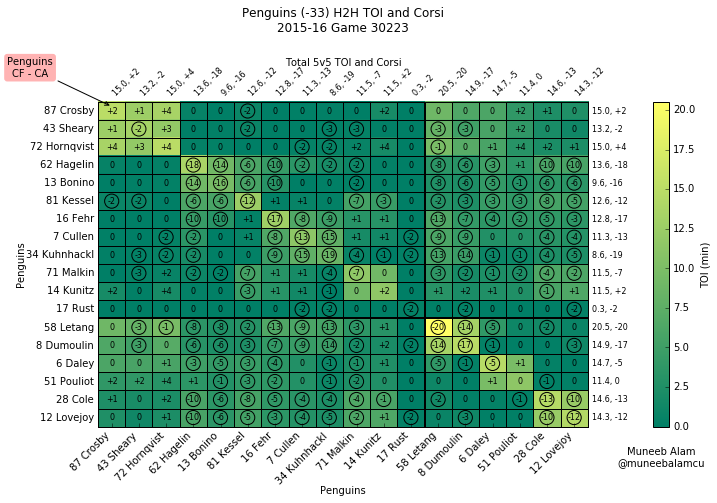

In [17]:
ChartMethods.general_h2h_chart(hwhtoi_h, hwhcf_h, hcorsi, hcorsi, htotalstoi, htotalstoi, brangey,
                      brangey, hname, horder, hnumbers, hname, horder[::-1], hnumbers, (num_fs[0], num_fs[0]), hteam_title,
                      hteam_file, True, True)

### Make the chart for the road team

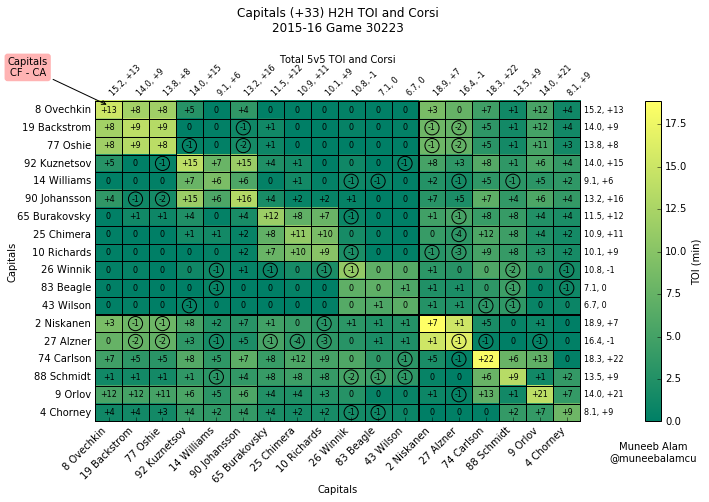

In [18]:
ChartMethods.general_h2h_chart(hwhtoi_r, hwhcf_r, rcorsi, rcorsi, rtotalstoi, rtotalstoi, brangex,
                      brangex, rname, rorder[::-1], rnumbers, rname, rorder, rnumbers, (num_fs[1], num_fs[1]), rteam_title,
                      rteam_file, True, True)